In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972602e+07,1.972602e+07,False,NaN,1,NaN,NaN,None,2024-07-15T17:03:00.000Z,63384.604245,3.244302e+10,51.7655,0.550861,5.380212,13.609195,-4.165708,-2.840779,1.270847,1.250326e+12,53.6917,1.331077e+12,None,2024-07-15T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202179e+08,1.202179e+08,True,NaN,2,NaN,NaN,None,2024-07-15T17:02:00.000Z,3383.844504,1.492850e+10,48.3630,0.414645,5.888018,13.879113,-4.793928,14.733063,10.613616,4.067988e+11,17.4801,4.067988e+11,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125369e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-15T17:02:00.000Z,1.000699,5.648389e+10,40.3913,0.009430,0.048246,0.097535,0.114092,0.056413,0.039588,1.126155e+11,4.8340,1.161533e+11,None,2024-07-15T17:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 22:34:41.510358
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475822e+08,1.475822e+08,False,NaN,4,NaN,NaN,None,2024-07-15T17:02:00.000Z,576.843501,1.898140e+09,29.5054,0.433241,7.472082,14.776693,-4.873657,1.643191,8.114144,8.513184e+10,3.6627,8.513184e+10,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640710e+08,5.801352e+08,True,NaN,5,NaN,NaN,None,2024-07-15T17:02:00.000Z,153.938529,2.182930e+09,11.8196,0.568157,5.762434,12.661135,6.070937,-2.671550,16.652029,7.143841e+10,3.0665,8.930516e+10,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358
5,3408,USDC,USDC,usd-coin,20962,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.389016e+10,3.389016e+10,False,NaN,6,NaN,NaN,None,2024-07-15T17:02:00.000Z,1.000095,6.209227e+09,54.0271,-0.000109,0.019849,0.007494,-0.010038,0.012800,0.021173,3.389338e+10,1.4582,3.389338e+10,None,2024-07-15T17:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 22:34:41.510358
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-15T17:03:00.000Z,0.533581,1.669485e+09,-24.8605,1.717093,0.540366,25.327612,9.850469,2.590494,8.206356,2.977669e+10,1.2811,5.335813e+10,None,2024-07-15T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506971e+09,5.109023e+09,True,NaN,8,3.414167e+09,2.551115e+10,None,2024-07-15T17:02:00.000Z,7.472144,2.322179e+08,37.3569,0.454973,2.020934,4.734466,-6.613315,10.539990,20.656911,1.873245e+10,0.8041,3.817536e+10,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.451279e

In [32]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

     
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df._append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\User1\API.csv'):
        df.to_csv(r'C:\Users\User1\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\User1\API.csv', mode='a', header=False)
        
    #Then to read in the file: 
        df = pd.read_csv(r'C:\Users\User1\API.csv')
        df

In [19]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972602e+07,1.972602e+07,False,NaN,1,NaN,NaN,None,2024-07-15T17:03:00.000Z,63384.604245,3.244302e+10,51.7655,0.550861,5.380212,13.609195,-4.165708,-2.840779,1.270847,1.250326e+12,53.6917,1.331077e+12,None,2024-07-15T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202179e+08,1.202179e+08,True,NaN,2,NaN,NaN,None,2024-07-15T17:02:00.000Z,3383.844504,1.492850e+10,48.3630,0.414645,5.888018,13.879113,-4.793928,14.733063,10.613616,4.067988e+11,17.4801,4.067988e+11,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.125369e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-15T17:02:00.000Z,1.000699,5.648389e+10,40.3913,0.009430,0.048246,0.097535,0.114092,0.056413,0.039588,1.126155e+11,4.8340,1.161533e+11,None,2024-07-15T17:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 22:34:41.510358,NaT
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475822e+08,1.475822e+08,False,NaN,4,NaN,NaN,None,2024-07-15T17:02:00.000Z,576.843501,1.898140e+09,29.5054,0.433241,7.472082,14.776693,-4.873657,1.643191,8.114144,8.513184e+10,3.6627,8.513184e+10,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640710e+08,5.801352e+08,True,NaN,5,NaN,NaN,None,2024-07-15T17:02:00.000Z,153.938529,2.182930e+09,11.8196,0.568157,5.762434,12.661135,6.070937,-2.671550,16.652029,7.143841e+10,3.0665,8.930516e+10,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
5,3408,USDC,USDC,usd-coin,20962,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.389016e+10,3.389016e+10,False,NaN,6,NaN,NaN,None,2024-07-15T17:02:00.000Z,1.000095,6.209227e+09,54.0271,-0.000109,0.019849,0.007494,-0.010038,0.012800,0.021173,3.389338e+10,1.4582,3.389338e+10,None,2024-07-15T17:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 22:34:41.510358,NaT
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-15T17:03:00.000Z,0.533581,1.669485e+09,-24.8605,1.717093,0.540366,25.327612,9.850469,2.590494,8.206356,2.977669e+10,1.2811,5.335813e+10,None,2024-07-15T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506971e+09,5.109023e+09,True,NaN,8,3.414167e+09,2.551115e+10,None,2024-07-15T17:02:00.000Z,7.472144,2.322179e+08,37.3569,0.454973,2.020934,4.734466,-6.613315,10.539990,20.656911,1.873245e+10,0.8041,3.817536e+10,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
8,74,Dogecoin,DOGE,dogecoin,1022,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt

In [28]:
df72 = pd.read_csv(r'C:\Users\User1\API.csv')
df72

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User1\\API.csv'

In [34]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11600,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19726015.00000,19726015.00000,False,NaN,1,NaN,NaN,None,2024-07-15T17:03:00.000Z,63384.60425,32443023124.66927,51.76550,0.55086,5.38021,13.60919,-4.16571,-2.84078,1.27085,1250325654114.35229,53.69170,1331076689153.95996,None,2024-07-15T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
1,1027,Ethereum,ETH,ethereum,9134,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120217949.15021,120217949.15021,True,NaN,2,NaN,NaN,None,2024-07-15T17:02:00.000Z,3383.84450,14928499815.92400,48.36300,0.41465,5.88802,13.87911,-4.79393,14.73306,10.61362,406798846572.35291,17.48010,406798846572.34998,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
2,825,Tether USDt,USDT,tether,91603,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112536925458.19319,116072162581.85667,True,NaN,3,NaN,NaN,None,2024-07-15T17:02:00.000Z,1.00070,56483889268.84438,40.39130,0.00943,0.04825,0.09754,0.11409,0.05641,0.03959,112615548167.67728,4.83400,116153255146.64000,None,2024-07-15T17:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-15 22:34:41.510358,NaT
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582205.77365,147582205.77365,False,NaN,4,NaN,NaN,None,2024-07-15T17:02:00.000Z,576.84350,1898139521.08167,29.50540,0.43324,7.47208,14.77669,-4.87366,1.64319,8.11414,85131836249.70917,3.66270,85131836249.71001,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464071036.79876,580135229.16488,True,NaN,5,NaN,NaN,None,2024-07-15T17:02:00.000Z,153.93853,2182930429.85804,11.81960,0.56816,5.76243,12.66113,6.07094,-2.67155,16.65203,71438412800.33070,3.06650,89305163853.75000,None,2024-07-15T17:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
5,3408,USDC,USDC,usd-coin,20962,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33890158933.88560,33890158933.88560,False,NaN,6,NaN,NaN,None,2024-07-15T17:02:00.000Z,1.00009,6209227117.49670,54.02710,-0.00011,0.01985,0.00749,-0.01004,0.01280,0.02117,33893375027.29358,1.45820,33893375027.29000,None,2024-07-15T17:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-15 22:34:41.510358,NaT
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-15T17:03:00.000Z,0.53358,1669484870.52979,-24.86050,1.71709,0.54037,25.32761,9.85047,2.59049,8.20636,29776688147.71663,1.28110,53358134595.93000,None,2024-07-15T17:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-15 22:34:41.510358,NaT
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506970733.36688,5109023413.04761,True,NaN,8,3414166606.00000,25511145740.61626,None,2024-07-15T17:02:00.000Z,7.47214,232217869.59900,37.35690,0.45497,2.02093,4.73447,-6.61332,10.53999,20.65691,18732447219.76582,0.80410,38175360468

In [38]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.92928,5.99195,13.95138,-3.83416,-2.48457,1.22518
Ethereum,0.76010,6.37096,14.35808,-4.55102,15.18868,10.78991
Tether USDt,0.01529,0.03531,0.09028,0.13061,0.07121,0.04017
BNB,0.50124,7.66469,14.87539,-4.69072,1.69431,7.95980
Solana,0.76040,6.22732,12.90452,6.49407,-2.56202,16.22615
USDC,0.00459,0.00933,0.00864,0.00766,0.01442,0.01268
XRP,1.75612,0.75896,25.32236,9.95788,2.65455,7.91019
Toncoin,0.42127,1.99556,4.67217,-6.79433,10.95572,21.12861
Dogecoin,1.60989,7.02925,13.69580,-11.49974,-20.28013,-21.35438


In [40]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.92928
             quote.USD.percent_change_24h     5.99195
             quote.USD.percent_change_7d     13.95138
             quote.USD.percent_change_30d    -3.83416
             quote.USD.percent_change_60d    -2.48457
             quote.USD.percent_change_90d     1.22518
Ethereum     quote.USD.percent_change_1h      0.76010
             quote.USD.percent_change_24h     6.37096
             quote.USD.percent_change_7d     14.35808
             quote.USD.percent_change_30d    -4.55102
             quote.USD.percent_change_60d    15.18868
             quote.USD.percent_change_90d    10.78991
Tether USDt  quote.USD.percent_change_1h      0.01529
             quote.USD.percent_change_24h     0.03531
             quote.USD.percent_change_7d      0.09028
             quote.USD.percent_change_30d     0.13061
             quote.USD.percent_change_60d     0.07121
             quote.USD.percent_change_90

In [42]:
type(df4)

pandas.core.series.Series

In [44]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.92928
            quote.USD.percent_change_24h   5.99195
            quote.USD.percent_change_7d   13.95138
            quote.USD.percent_change_30d  -3.83416
            quote.USD.percent_change_60d  -2.48457
            quote.USD.percent_change_90d   1.22518
Ethereum    quote.USD.percent_change_1h    0.76010
            quote.USD.percent_change_24h   6.37096
            quote.USD.percent_change_7d   14.35808
            quote.USD.percent_change_30d  -4.55102
            quote.USD.percent_change_60d  15.18868
            quote.USD.percent_change_90d  10.78991
Tether USDt quote.USD.percent_change_1h    0.01529
            quote.USD.percent_change_24h   0.03531
            quote.USD.percent_change_7d    0.09028
            quote.USD.percent_change_30d   0.13061
            quote.USD.percent_change_60d   0.07121
            quote.USD.percent_change_90d   0.04017
BNB         quote.USD.percent_change_1h    0.50124
            quote.USD.percent_change_24h   7.66469
            quote.USD.percent_change_7d   14.87539
            quote.USD.percent_change_30d  -4.69072
            quote.USD.percent_change_60d   1.69431
            quote.USD.percent_change_90d   7.95980
Solana      quote.USD.percent_change_1h    0.76040
            quote.USD.percent_change_24h   6.22732
            quote.USD.percent_change_7d   12.90452
            quote.USD.percent_change_30d   6.49407
            quote.USD.percent_change_60d  -2.56202
            quote.USD.percent_change_90d  16.22615
USDC        quote.USD.percent_change_1h    0.00459
            quote.USD.percent_change_24h   0.00933
            quote.USD.percent_change_7d    0.00864
            quote.USD.percent_change_30d   0.00766
            quote.USD.percent_change_60d   0.01442
            quote.USD.percent_change_90d   0.01268
XRP         quote.USD.percent_change_1h    1.75612
            quote.USD.percent_change_24h   0.75896
            quote.USD.percent_change_7d   25.32236
            quote.USD.percent_change_30d   9.95788
            quote.USD.percent_change_60d   2.65455
            quote.USD.percent_change_90d   7.91019
Toncoin     quote.USD.percent_change_1h    0.42127
            quote.USD.percent_change_24h   1.99556
            quote.USD.percent_change_7d    4.67217
            quote.USD.percent_change_30d  -6.79433
            quote.USD.percent_change_60d  10.95572
            quote.USD.percent_change_90d  21.12861
Dogecoin    quote.USD.percent_change_1h    1.60989
            quote.USD.percent_change_24h   7.02925
            quote.USD.percent_change_7d   13.69580
            quote.USD.percent_change_30d -11.49974
            quote.USD.percent_change_60d -20.28013
            quote.USD.percent_change_90d -21.35438
Cardano     quote.USD.percent_change_1h    0.49989
            quote.USD.percent_change_24h   1.51779
            quote.USD.percent_change_7d   20.41959
            quote.USD.percent_change_30d   6.24945
            quote.USD.percent_change_60d  -4.44596
            quote.USD.percent_change_90d  -3.10266
TRON        quote.USD.percent_change_1h    0.00226
            quote.USD.percent_change_24h   0.32886
            quote.USD.percent_change_7d   10.19844
            quote.USD.percent_change_30d  19.96242
            quote.USD.percent_change_60d   9.71467
            quote.USD.percent_change_90d  25.23635
Shiba Inu   quote.USD.percent_change_1h    2.38632
            quote.USD.percent_change_24h   7.04485
            quote.USD.percent_change_7d   15.98284
            quote.USD.percent_change_30d -11.15869
            quote.USD.percent_change_60d -24.76134
            quote.USD.percent_change_90d -17.76607
Avalanche   quote.USD.percent_change_1h    0.55317
            quote.USD.percent_change_24h   4.79059
            quote.USD.percent_change_7d    4.84575
            quote.USD.percent_change_30d -10.08389
            quote.USD.percent_change_60d -20.66168
            quo

In [46]:
df5.count()

values    90
dtype: int64

In [56]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.92928
1,Bitcoin,quote.USD.percent_change_24h,5.99195
2,Bitcoin,quote.USD.percent_change_7d,13.95138
3,Bitcoin,quote.USD.percent_change_30d,-3.83416
4,Bitcoin,quote.USD.percent_change_60d,-2.48457
5,Bitcoin,quote.USD.percent_change_90d,1.22518
6,Ethereum,quote.USD.percent_change_1h,0.76010
7,Ethereum,quote.USD.percent_change_24h,6.37096
8,Ethereum,quote.USD.percent_change_7d,14.35808
9,Ethereum,quote.USD.percent_change_30d,-4.55102


In [58]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.92928
1,Bitcoin,quote.USD.percent_change_24h,5.99195
2,Bitcoin,quote.USD.percent_change_7d,13.95138
3,Bitcoin,quote.USD.percent_change_30d,-3.83416
4,Bitcoin,quote.USD.percent_change_60d,-2.48457
5,Bitcoin,quote.USD.percent_change_90d,1.22518
6,Ethereum,quote.USD.percent_change_1h,0.76010
7,Ethereum,quote.USD.percent_change_24h,6.37096
8,Ethereum,quote.USD.percent_change_7d,14.35808
9,Ethereum,quote.USD.percent_change_30d,-4.55102


In [72]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.92928
1,Bitcoin,24h,5.99195
2,Bitcoin,7d,13.95138
3,Bitcoin,30d,-3.83416
4,Bitcoin,60d,-2.48457
5,Bitcoin,90d,1.22518
6,Ethereum,1h,0.76010
7,Ethereum,24h,6.37096
8,Ethereum,7d,14.35808
9,Ethereum,30d,-4.55102


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

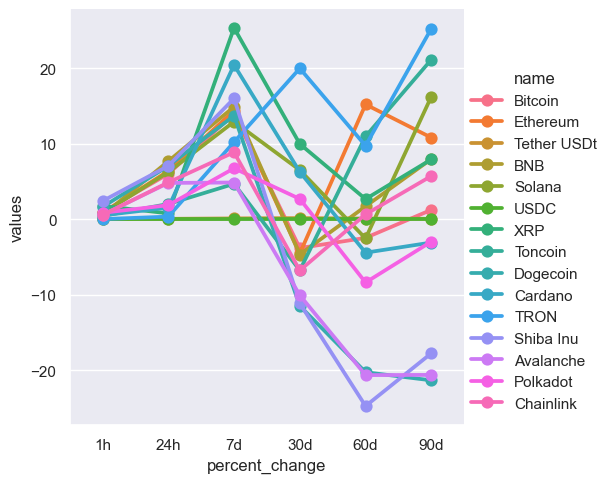

In [74]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [78]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63384.60425,2024-07-15 22:34:41.510358
0,Bitcoin,63691.30135,NaT
0,Bitcoin,63679.19397,NaT
0,Bitcoin,63682.93595,NaT
0,Bitcoin,63666.53951,NaT
0,Bitcoin,63672.37560,NaT
0,Bitcoin,63687.85237,NaT
0,Bitcoin,63664.28398,NaT
0,Bitcoin,63676.93207,NaT
0,Bitcoin,63663.20381,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

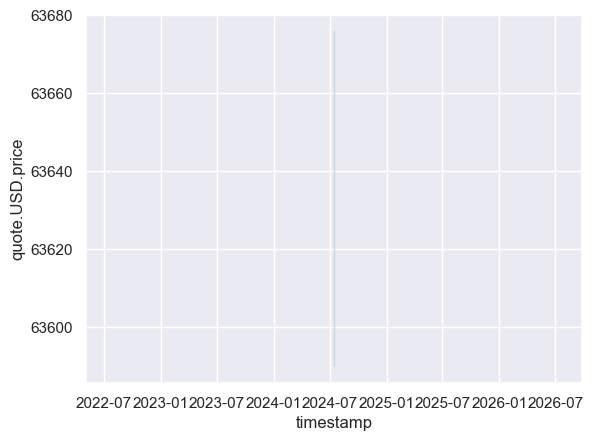

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)